<a href="https://colab.research.google.com/github/Victorkkn/DeepLearning/blob/main/Exemplo_Classifica%C3%A7%C3%A3o_Autoencoder_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, ConfusionMatrixDisplay
from sklearn.manifold import TSNE


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [ ]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder = Model(input_img, encoded)
encoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0061 - loss: 0.3942 - val_accuracy: 0.0094 - val_loss: 0.1867
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0095 - loss: 0.1772 - val_accuracy: 0.0128 - val_loss: 0.1530
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0117 - loss: 0.1493 - val_accuracy: 0.0099 - val_loss: 0.1340
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0115 - loss: 0.1320 - val_accuracy: 0.0101 - val_loss: 0.1221
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0103 - loss: 0.1213 - val_accuracy: 0.0108 - val_loss: 0.1140
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0103 - loss: 0.1139 - val_accuracy: 0.0112 - val_loss: 0.1082
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0116 - loss: 0.1083 - val_accuracy: 0.0115 - val_loss: 0.1038
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0110 - loss: 0.1044 - val_accuracy: 0

In [ ]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
encoded_imgs.shape

(10000, 32)

In [ ]:
predicted.shape

(10000, 784)

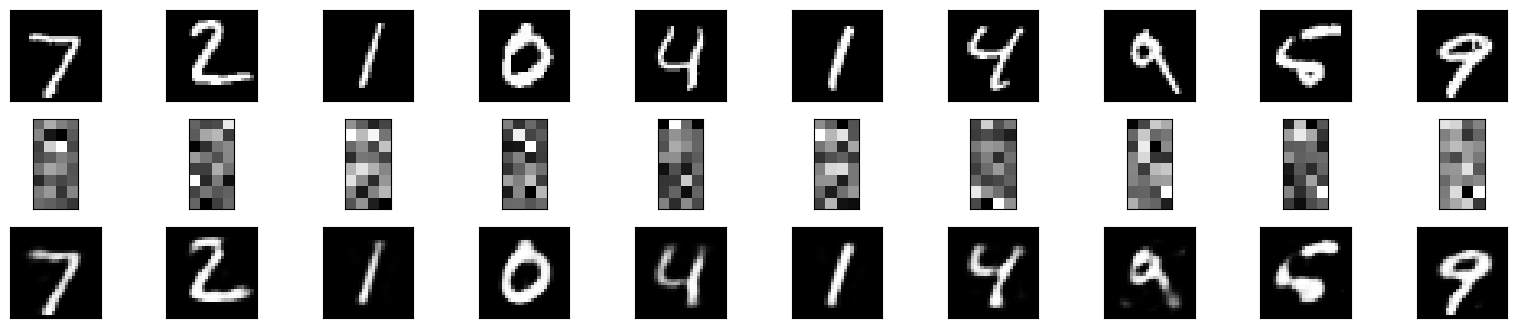

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(60000, 32)
(10000, 32)


# Processo de Classificaçao com Random Forest

In [ ]:
modelRf = RandomForestClassifier()
modelRf.fit(X_train_encoded, y_train)
y_pred = modelRf.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.93      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.97      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

0.9467


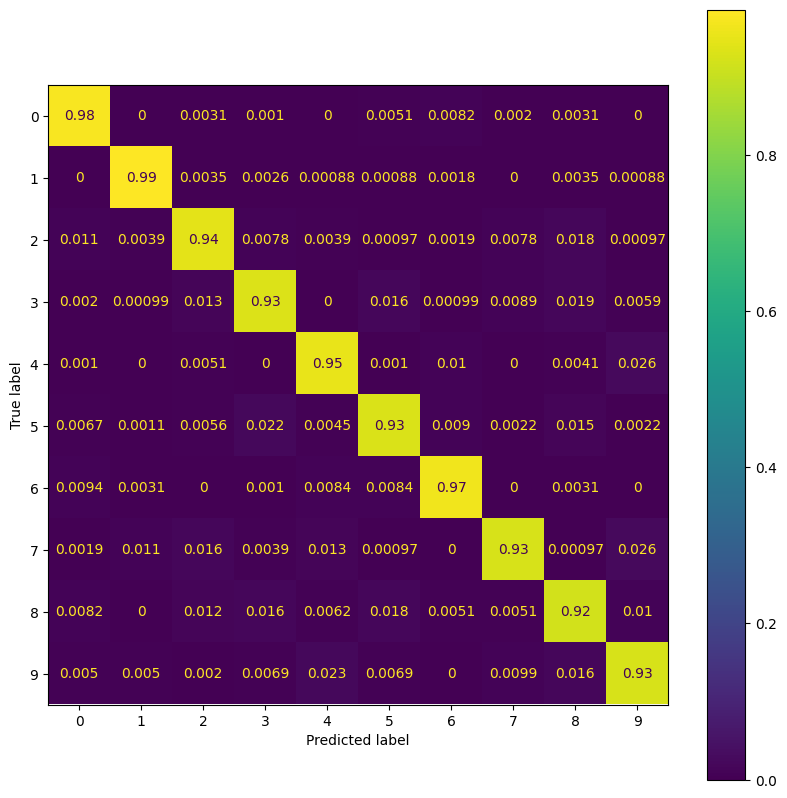

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(y_test, y_pred, labels=modelRf.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelRf.classes_)

disp.plot(ax = ax)
plt.show()

# Exemplo de Data Visualization a partir da camada Coded do Autoencoder

In [ ]:
tsne = TSNE(n_iter=2000)
X_embedded_tsne = tsne.fit_transform(X_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Axes: >

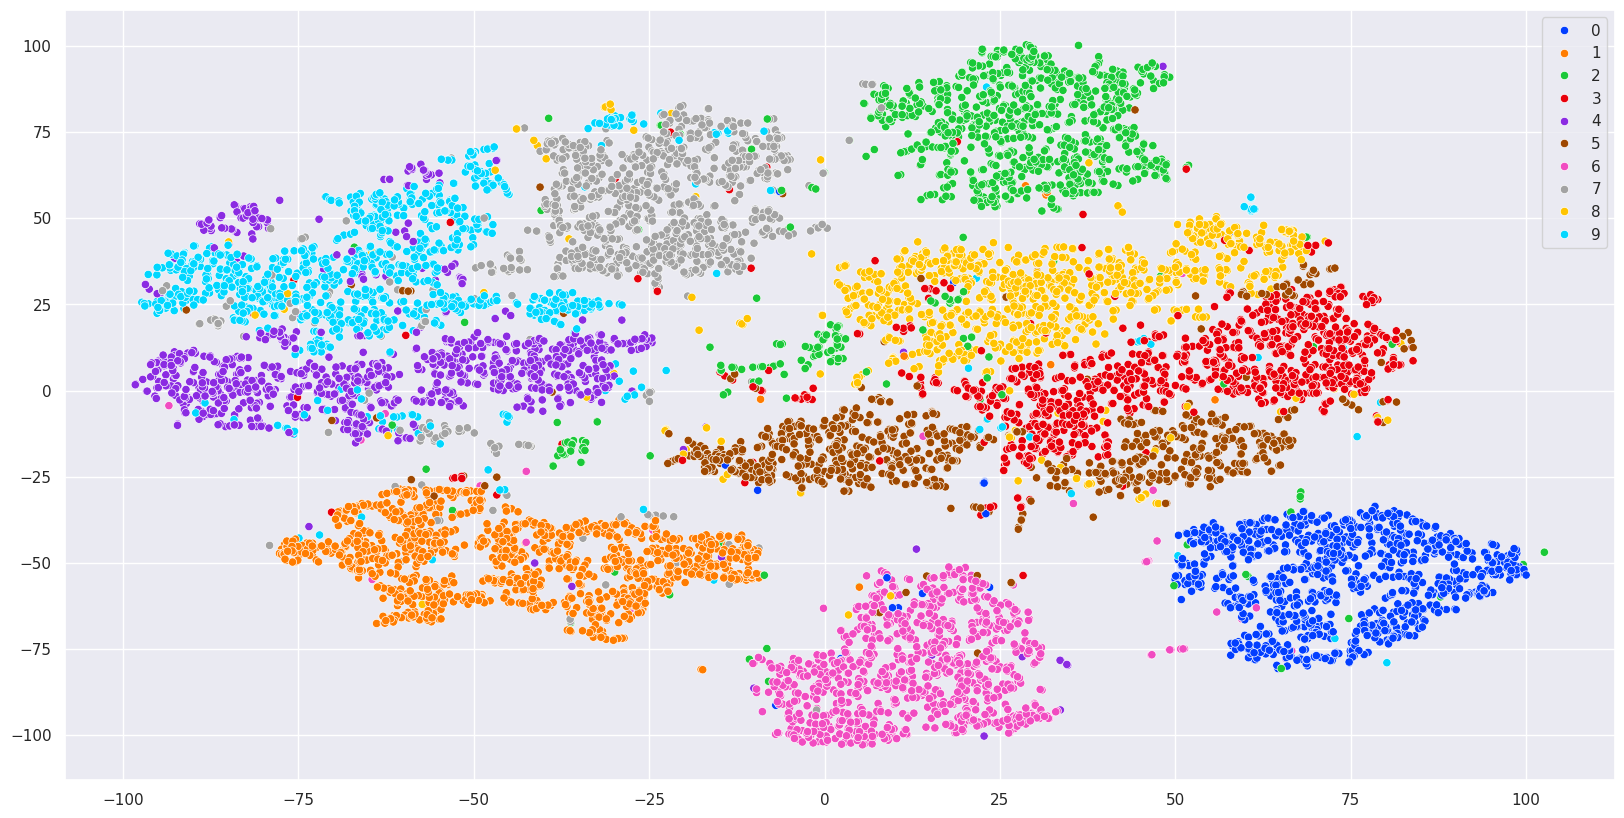

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(x = X_embedded_tsne[:,0], y = X_embedded_tsne[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
X_embedded_tsne.shape

(10000, 2)